In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("s3://preprocessoroutputs/income.txt")

In [18]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [19]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [20]:
numerical = data[data.columns[data.dtypes==int]]

In [21]:
n = 0
for d in data.columns:
    n += (data[d]=="?").sum()
print(n)


4262


In [22]:
data.shape

(32561, 15)

In [23]:
data.replace("?", np.nan, inplace=True)

In [24]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [26]:
data.columns[data.isnull().sum() !=0]

Index(['workclass', 'occupation', 'native.country'], dtype='object')

In [13]:
data["native.country"].mode()[0]

'United-States'

In [27]:
for x in data.columns[data.isnull().sum() !=0]:
  data[x].fillna(data[x].mode()[0], inplace=True)

In [28]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [29]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [30]:
data.income.value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [31]:
data.income.value_counts()/data.shape[0]*100

income
<=50K    75.919044
>50K     24.080956
Name: count, dtype: float64

In [32]:
categorical = data.columns[data.dtypes==object]

In [33]:
for c in categorical:
    print(data[c].value_counts())
    print(" ")

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
 
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
 
marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
 
occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical   

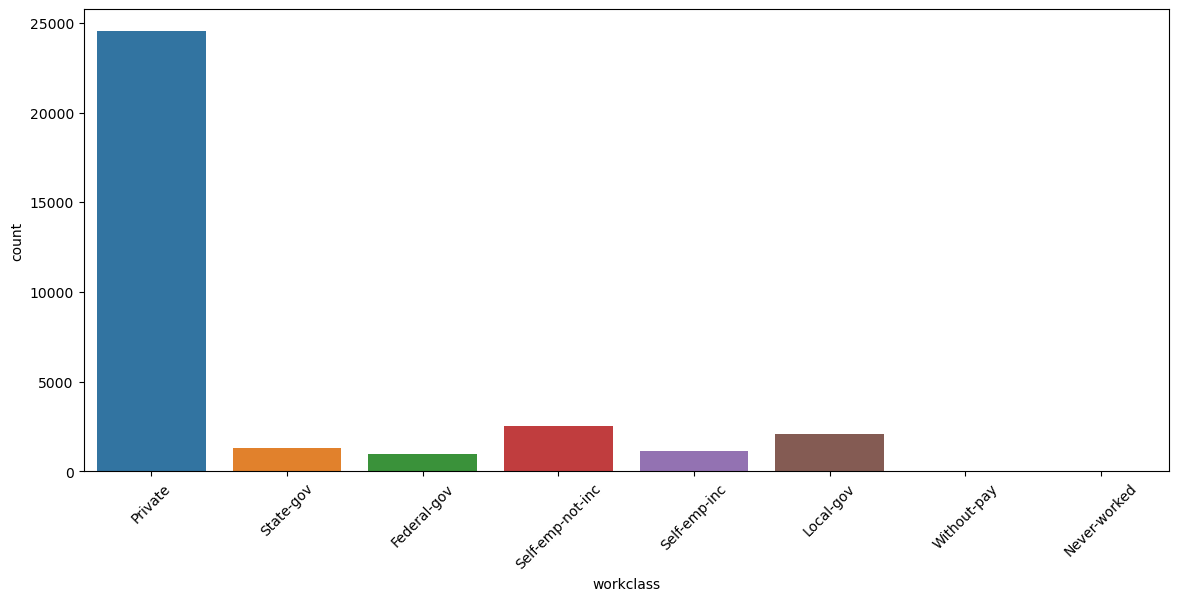

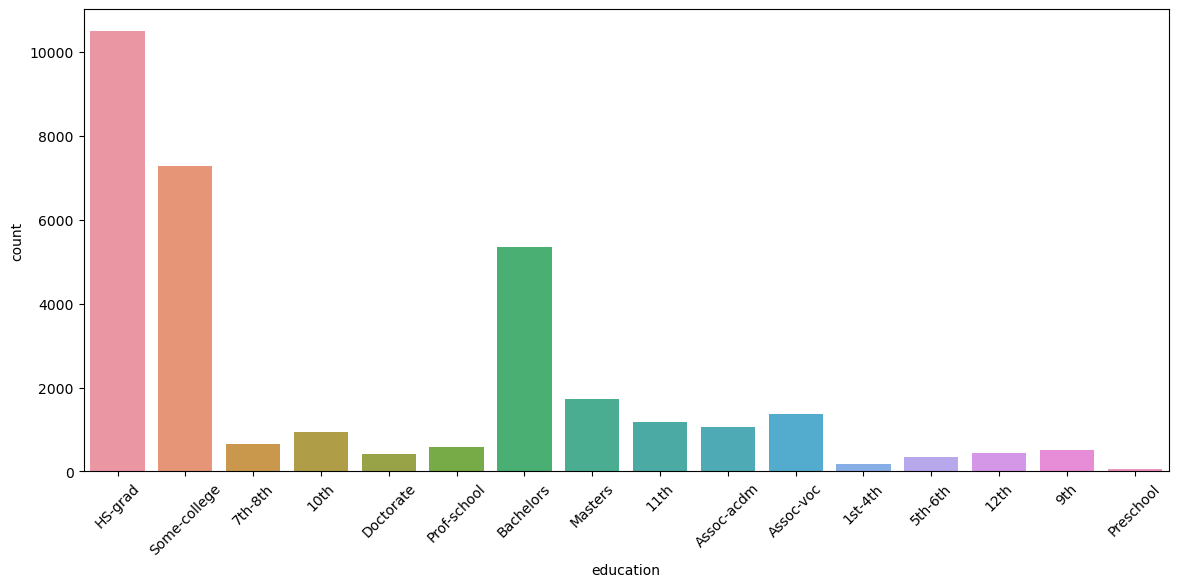

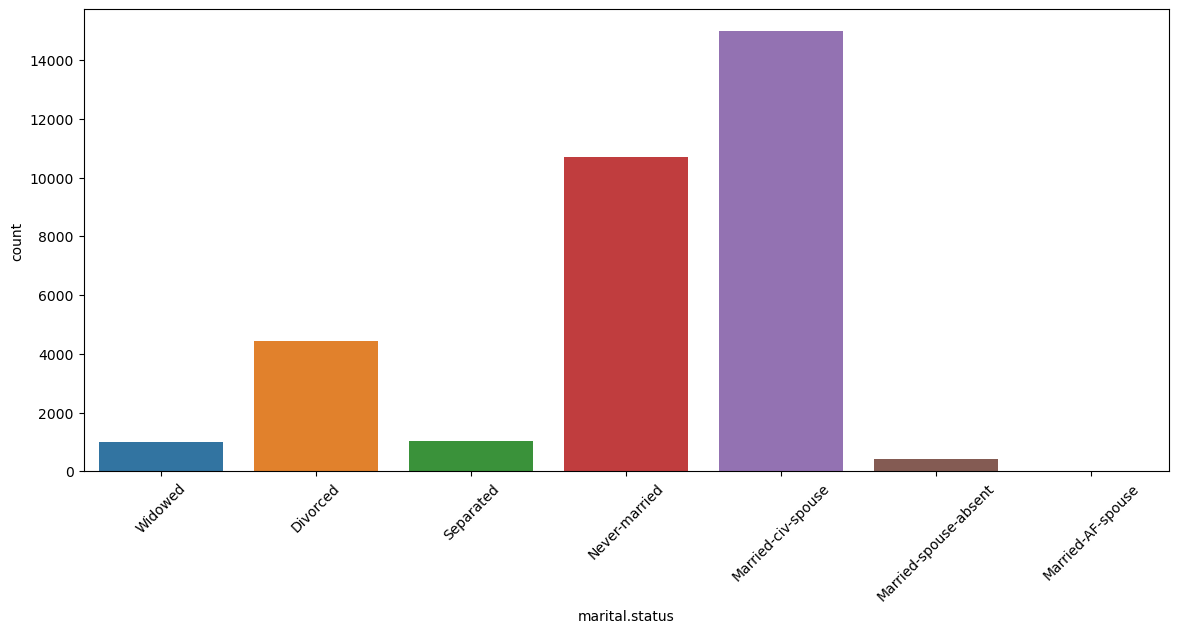

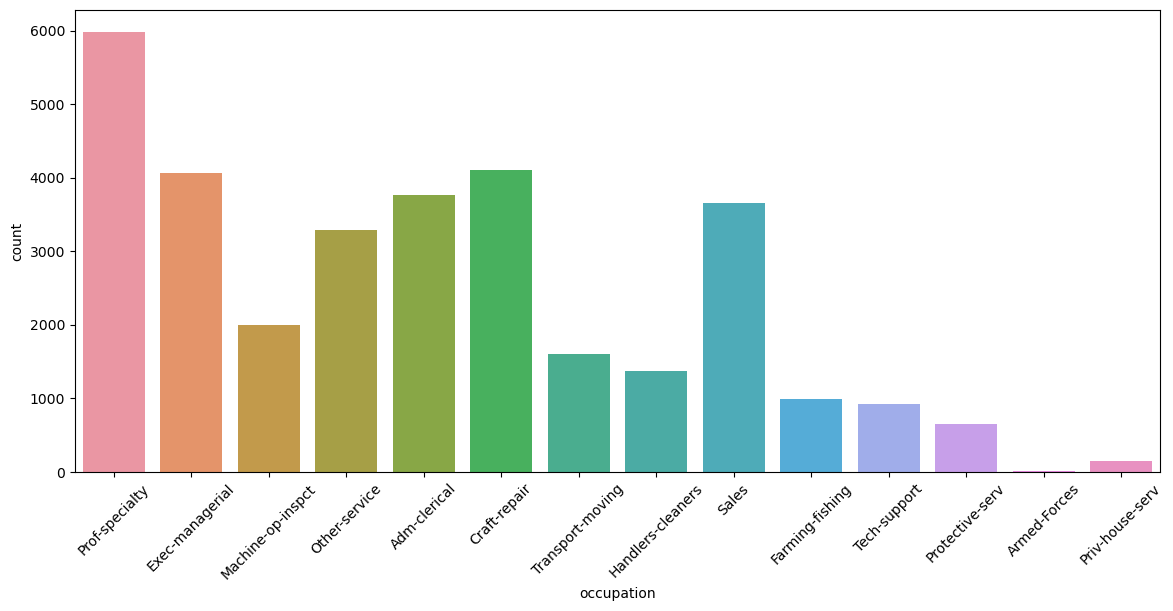

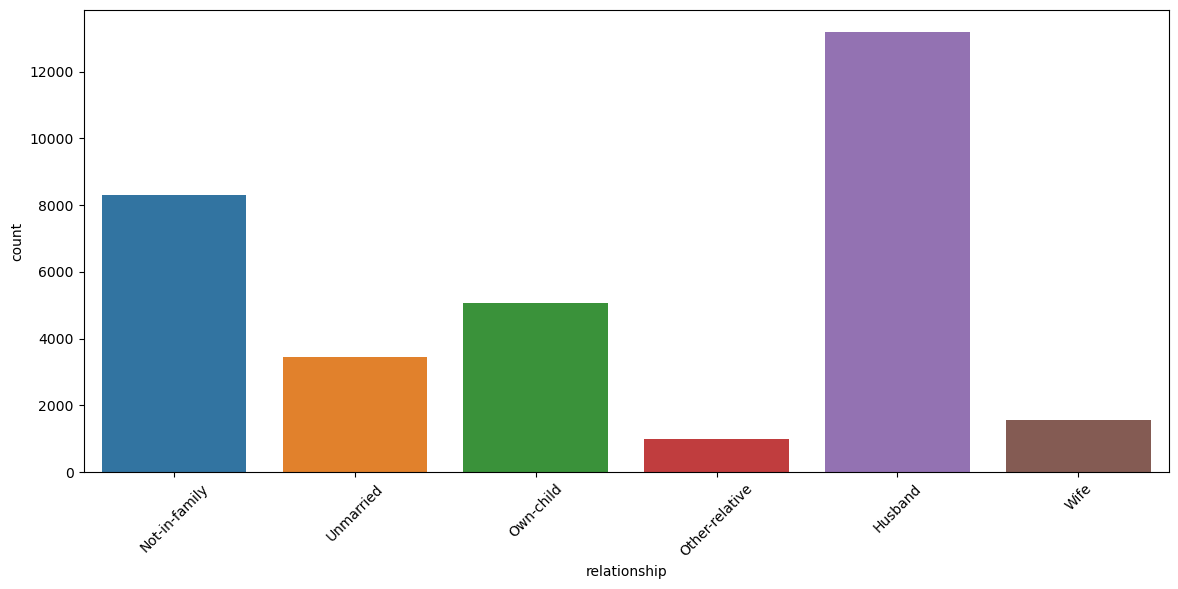

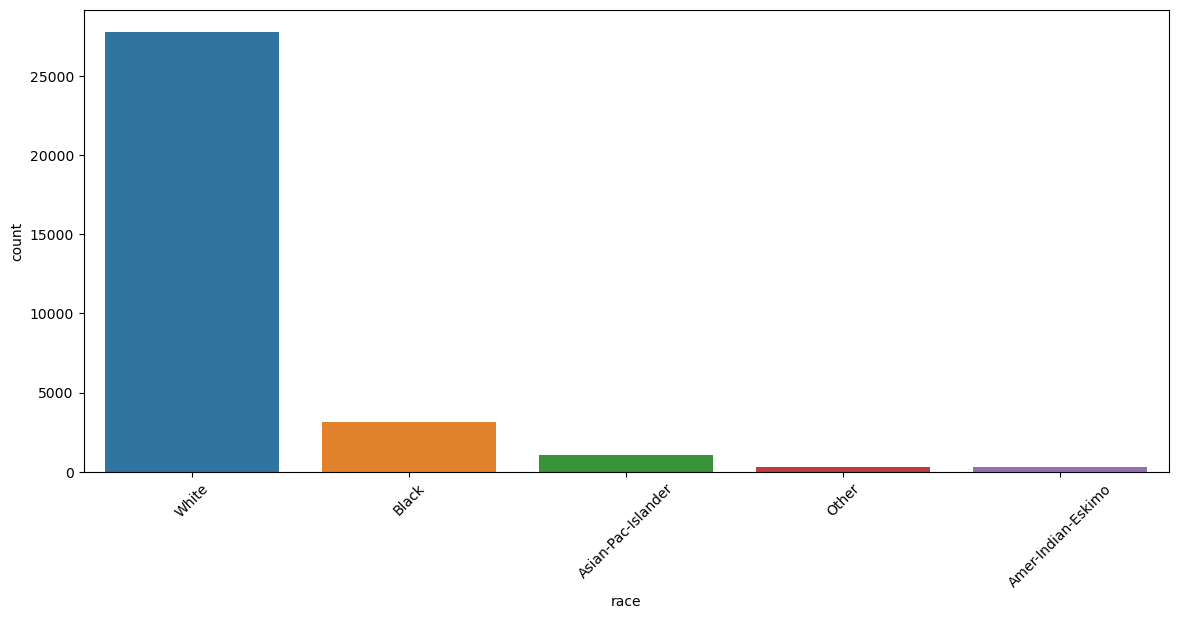

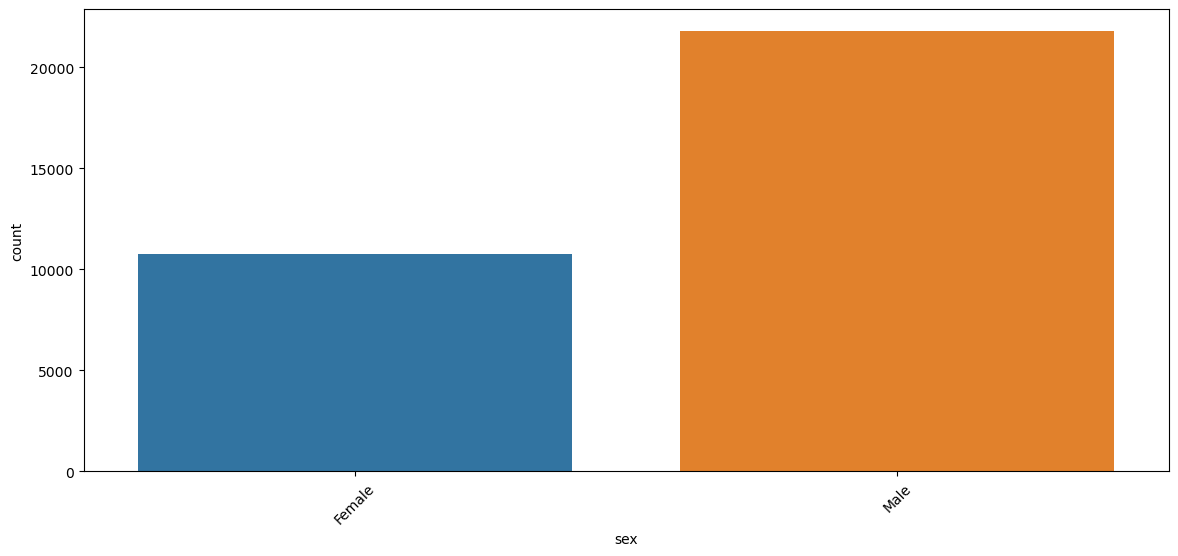

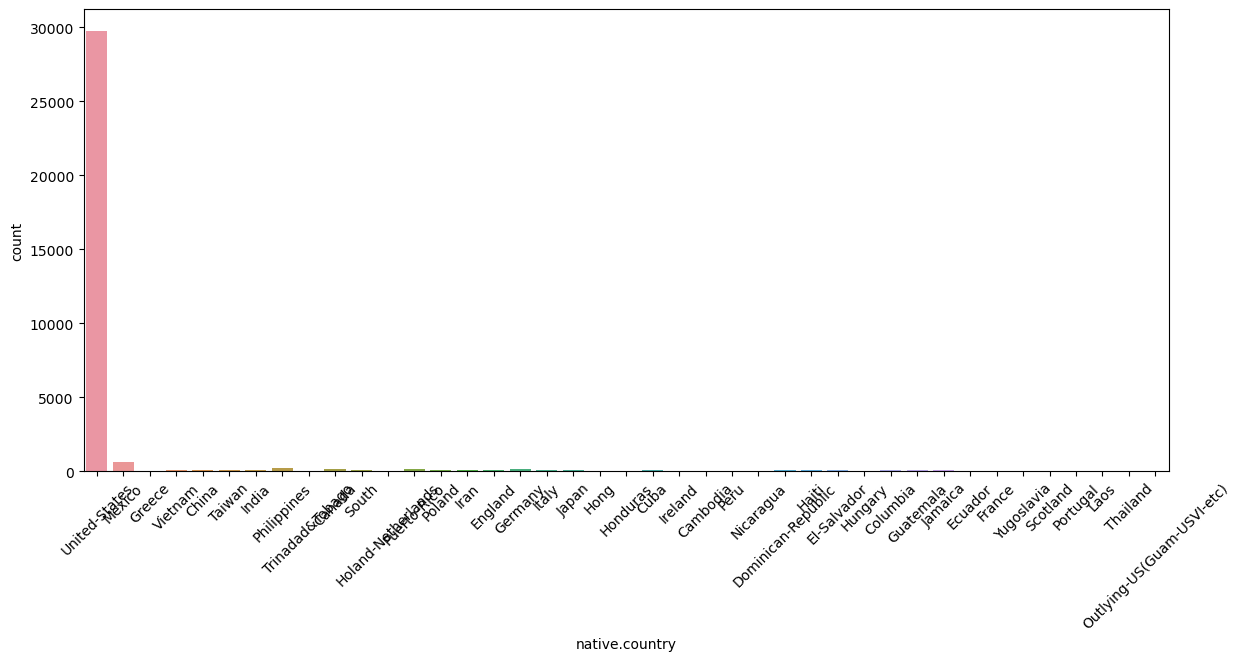

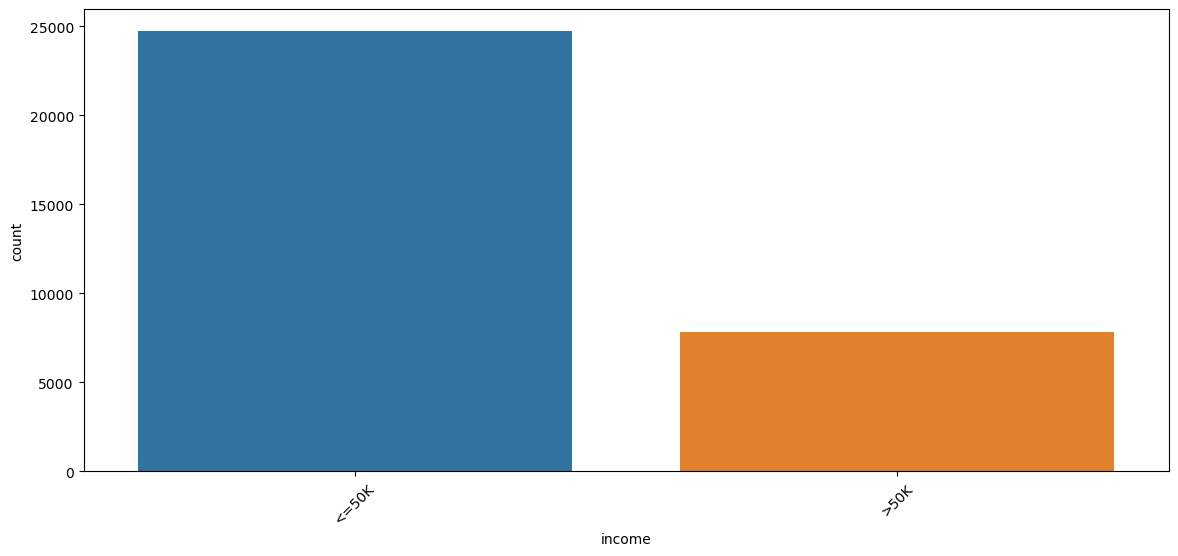

In [35]:
for c in categorical:
    plt.figure(figsize=(14,6))
    sns.countplot(x=c, data=data)
    plt.xticks(rotation=45)
    plt.show()

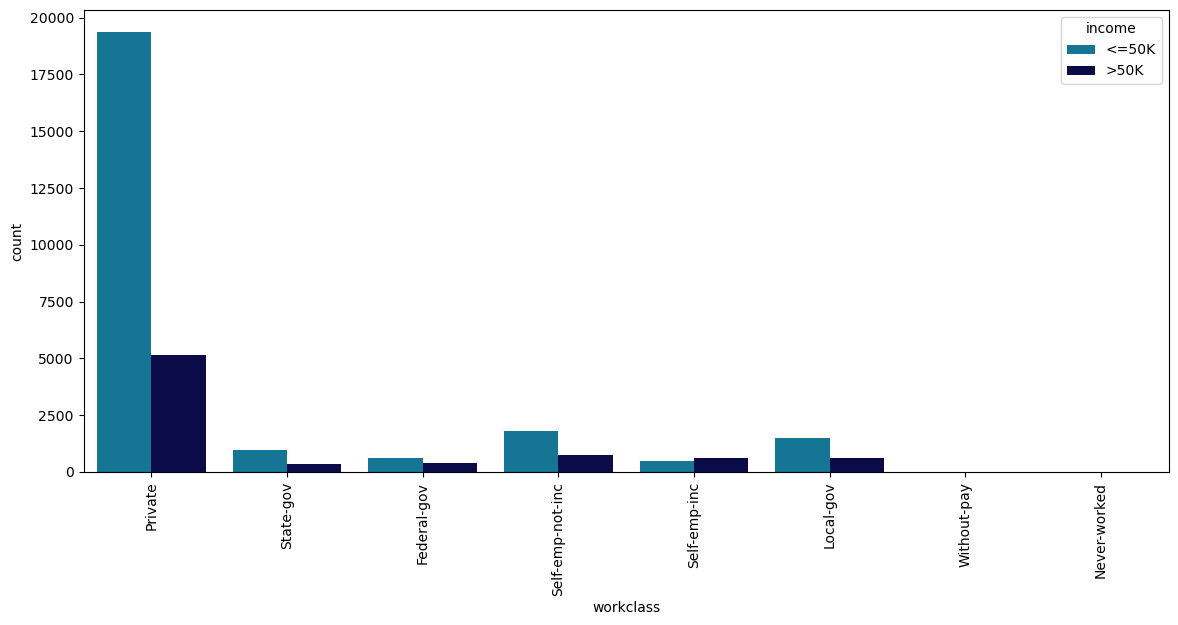

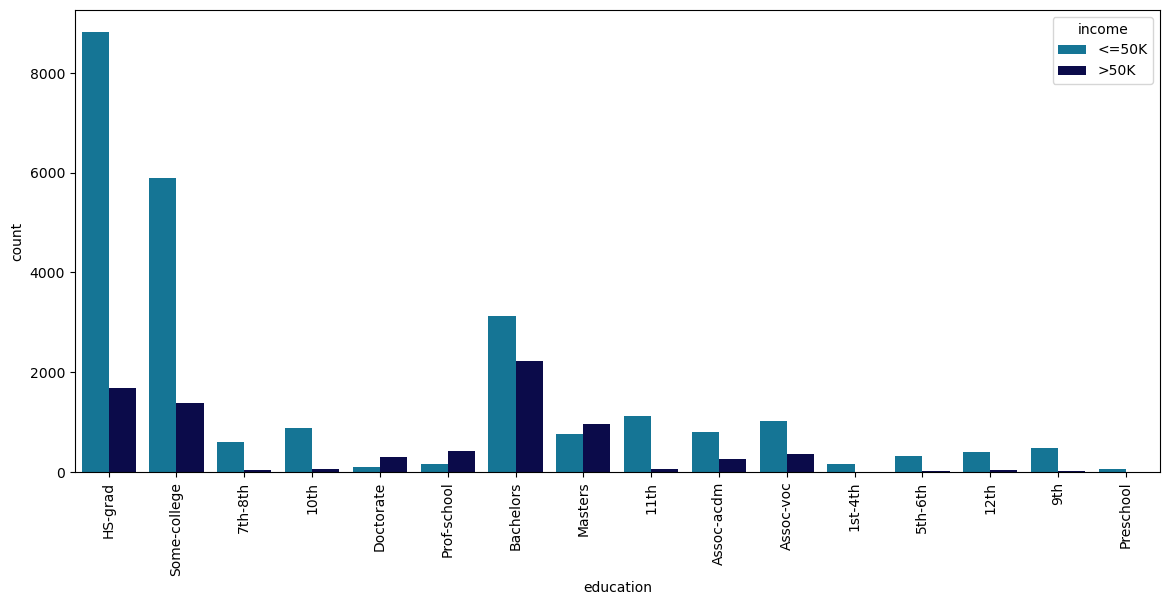

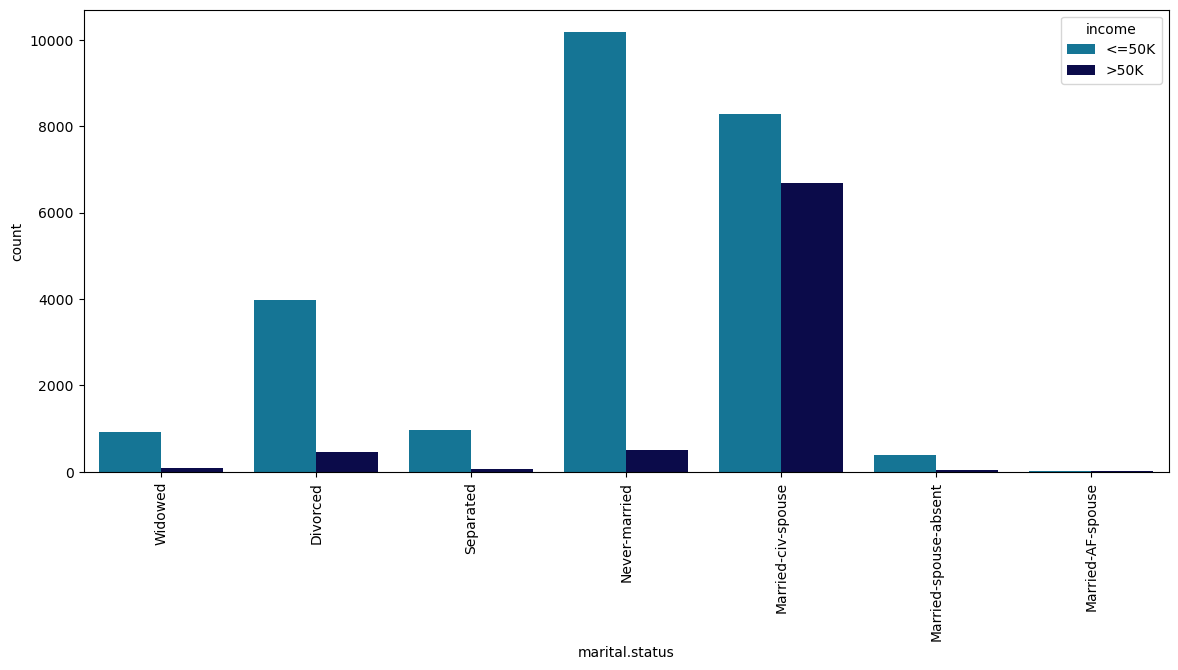

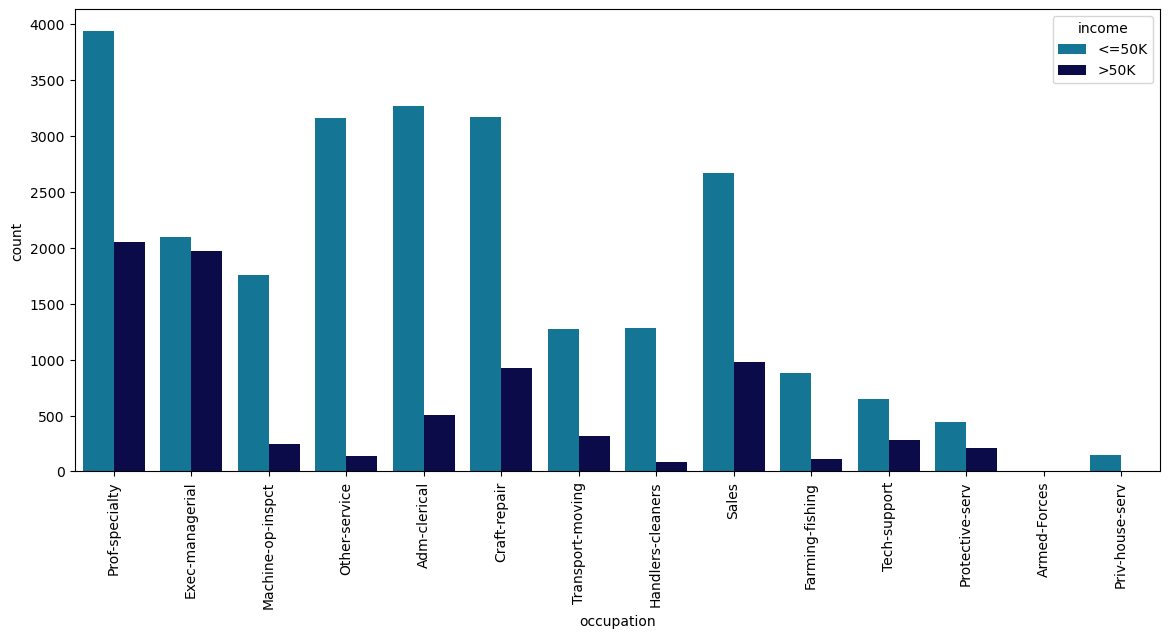

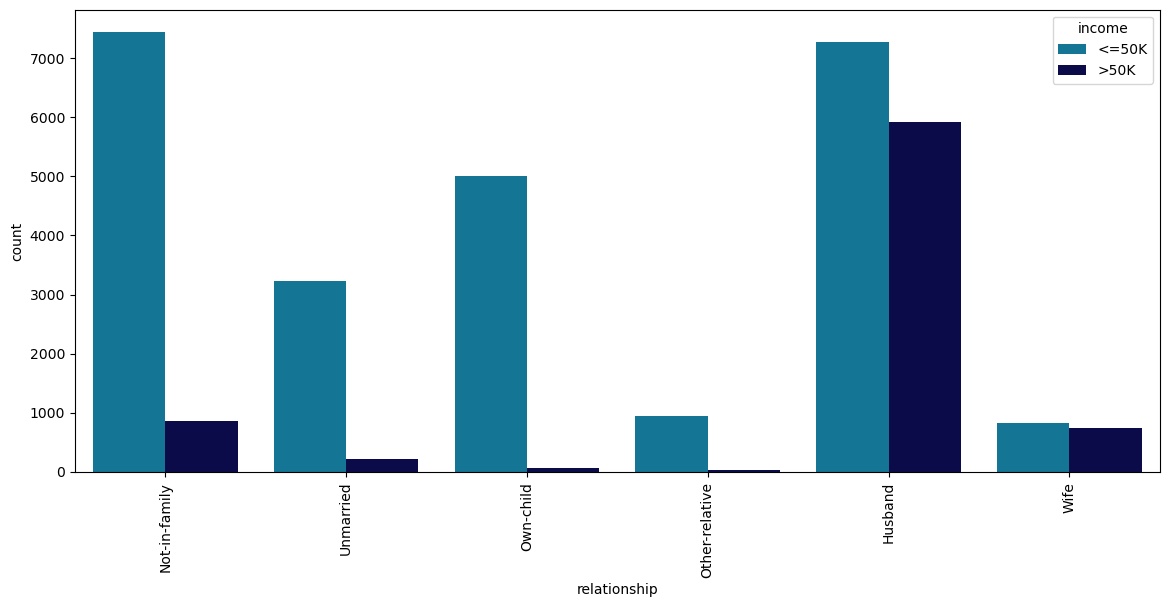

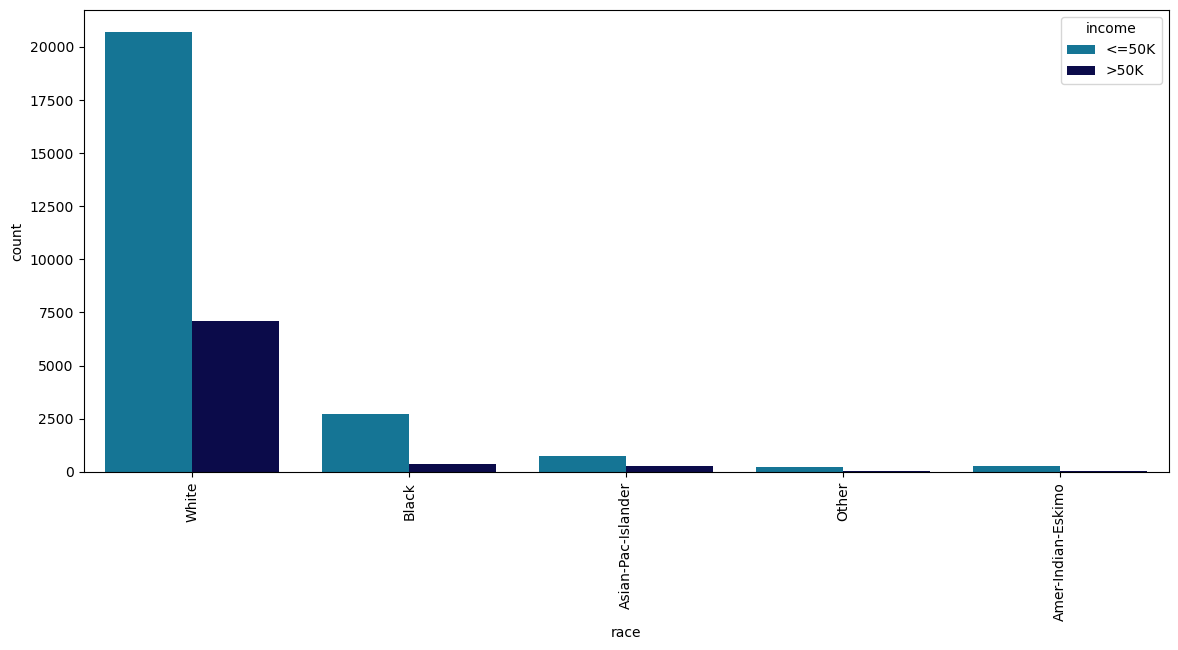

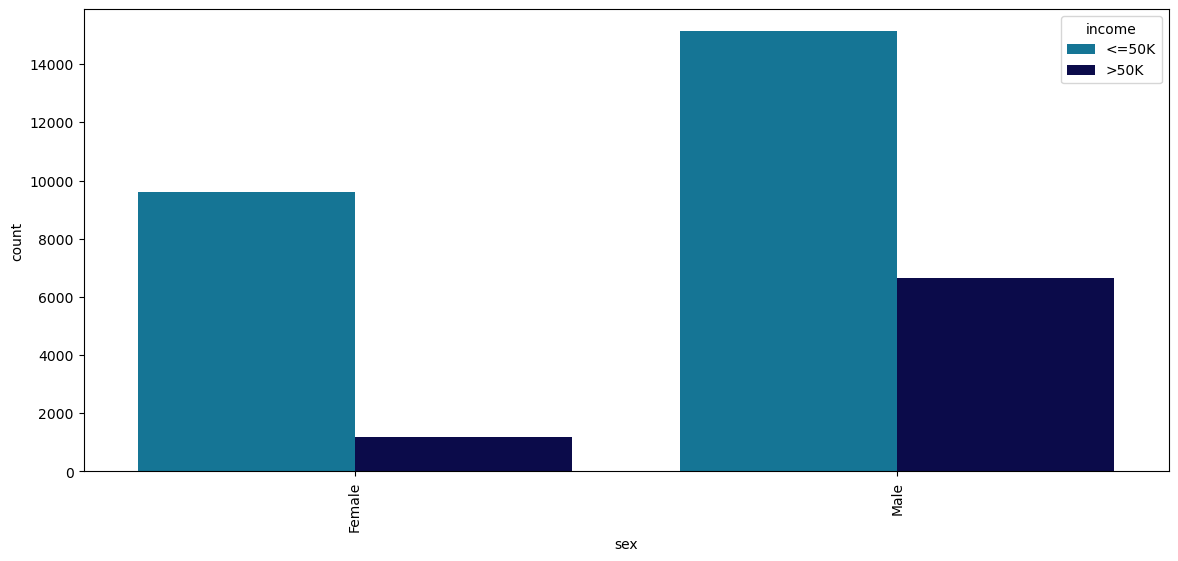

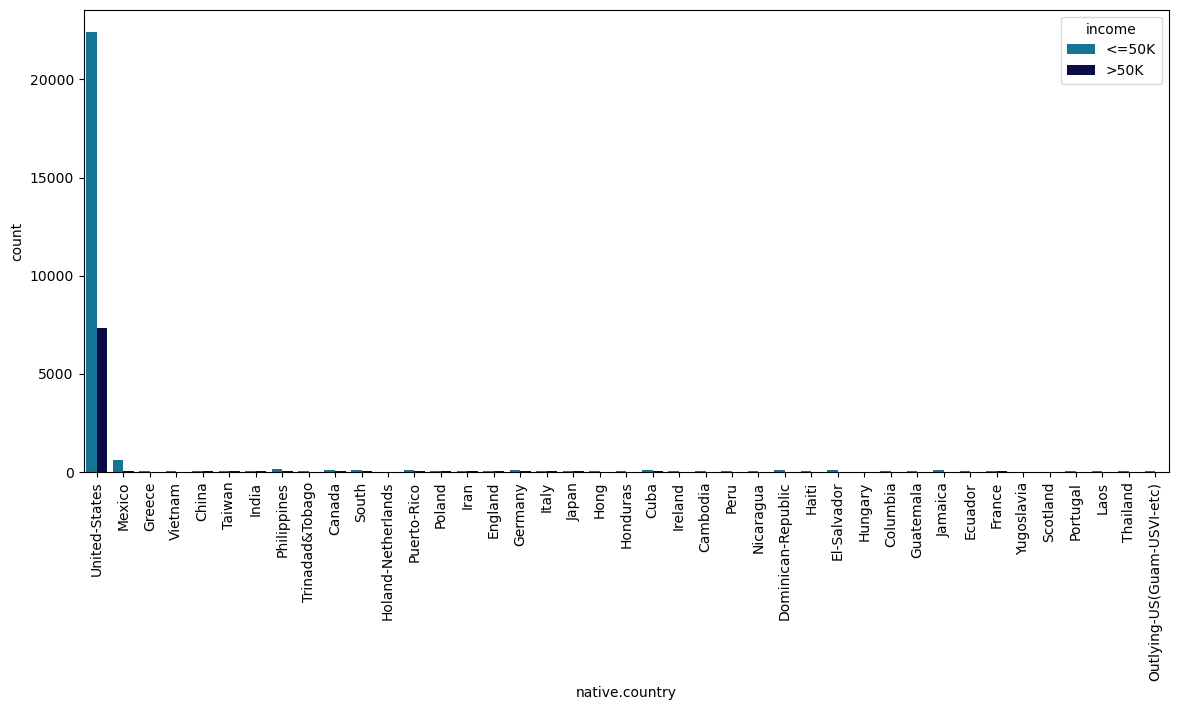

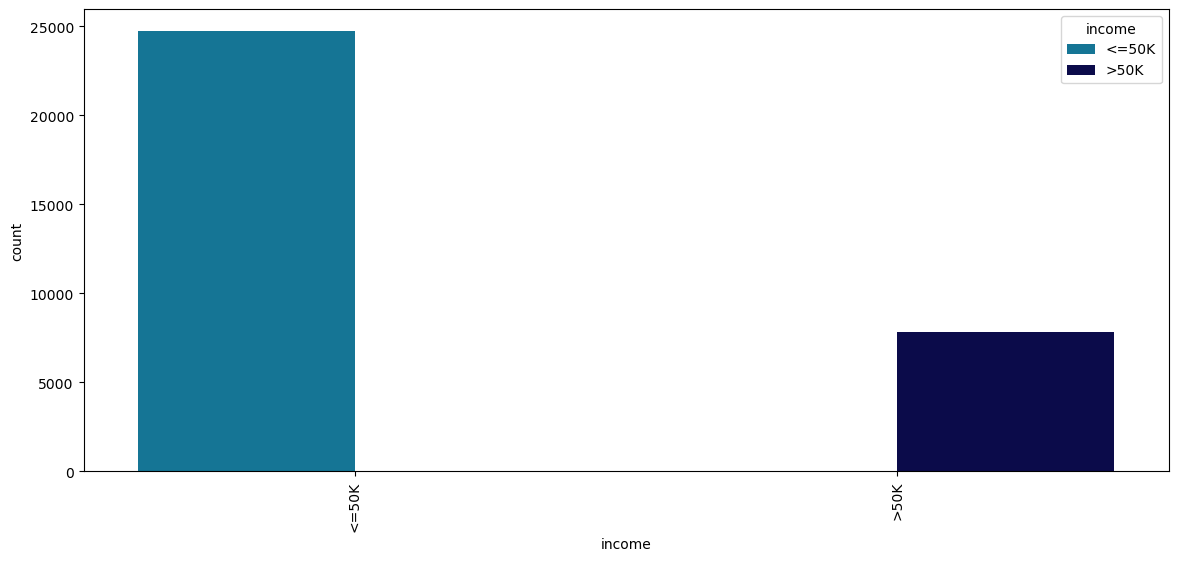

In [36]:
for c in categorical:
    plt.figure(figsize=(14,6))
    sns.countplot(x=c, data=data, hue="income", palette="ocean_r")
    plt.xticks(rotation=90)
    plt.show()

In [37]:
numerical.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<Axes: >

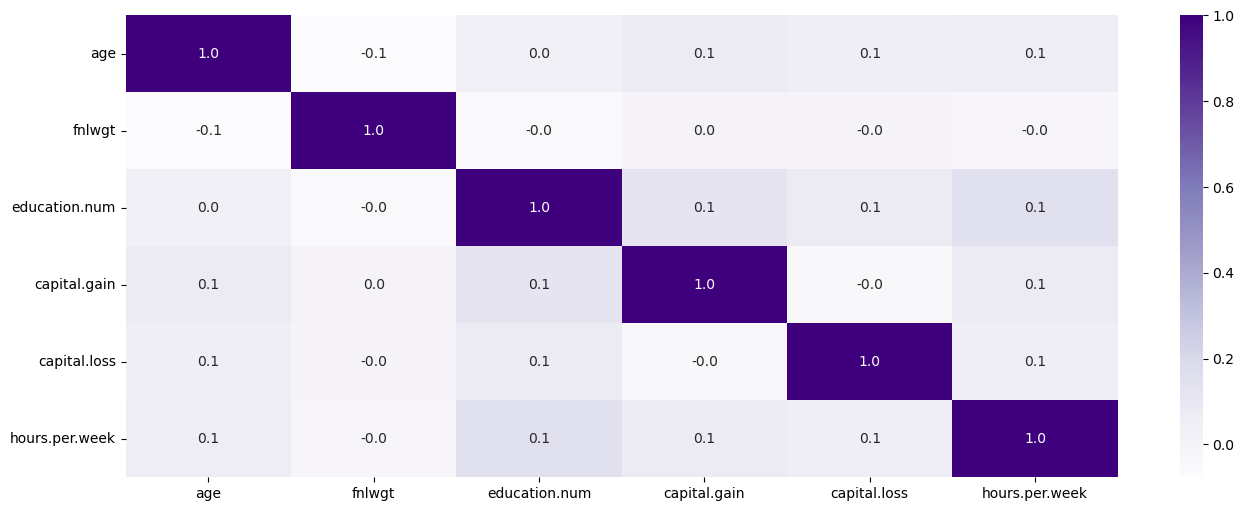

In [38]:
plt.figure(figsize=(16,6))
sns.heatmap(numerical.corr(), annot=True, fmt=".1f", cmap="Purples")

In [39]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for c in data.columns[data.dtypes==object]:
  encoder.fit(data[c])
  data[c] = encoder.transform(data[c])
  mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
  print(c,":",mapping)

workclass : {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}
education : {'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}
marital.status : {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
occupation : {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
relationship : {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
race : {'Amer-

In [41]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[["age", "hours.per.week","fnlwgt","capital.loss"]] = scaler.fit_transform(data[["age", "hours.per.week","fnlwgt","capital.loss"]])

In [43]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,3,-1.067997,11,9,6,9,1,4,0,0,10.593507,-0.035429,38,0
1,3.183112,3,-0.539169,11,9,6,3,1,4,0,0,10.593507,-1.817204,38,0
2,2.010110,3,-0.035220,15,10,6,9,4,2,0,0,10.593507,-0.035429,38,0
3,1.130359,3,-0.468215,5,4,0,6,4,4,0,0,9.461864,-0.035429,38,0
4,0.177296,3,0.709482,15,10,5,9,3,4,0,0,9.461864,-0.035429,38,0


In [ ]:
data[data["capital.gain"]!=0]["income"].value_counts()

In [ ]:
data.head()

In [ ]:
data["capital.gain"].describe()

In [44]:
data.income.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [45]:
zero = data[data.income==0]

In [46]:
one = data[data.income==1]

In [47]:
from sklearn.utils import resample
oversample = resample(one, replace=True, n_samples=len(zero))

In [48]:
data2 = pd.concat([oversample, zero], axis=0)
data2.income.value_counts()

income
1    24720
0    24720
Name: count, dtype: int64

In [49]:
data2.shape

(49440, 15)

In [50]:
x = data2.drop(["income"],axis=1)
y = data2.income

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.4)

In [ ]:
"""
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_x = pca.fit_transform(X_train)
pca_xtest = pca.transform(X_test)
"""

In [64]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
selector = SelectKBest(f_classif, k=6)
selector.fit(X_train, y_train)
best = X_train.columns[selector.get_support()]
x_train_b = X_train[best]
x_test_b = X_test[best]

In [53]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 1.9 MB/s eta 0:00:0000:0100:01


In [65]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier()
model.fit(X_train, y_train)
ans = model.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
score = accuracy_score(y_test, ans)
score*100

91.80825242718447

In [68]:
report = classification_report(y_test, ans)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4981
           1       0.88      0.97      0.92      4907

    accuracy                           0.92      9888
   macro avg       0.92      0.92      0.92      9888
weighted avg       0.92      0.92      0.92      9888



<Axes: >

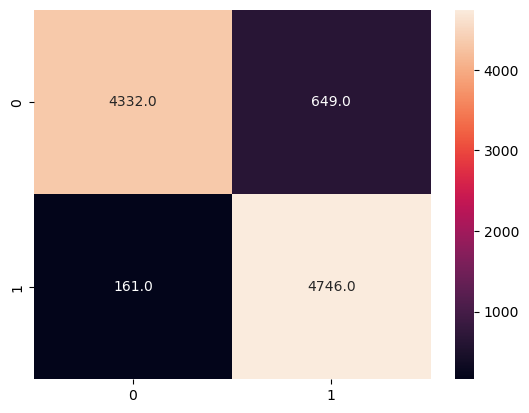

In [69]:
matrix = confusion_matrix(y_test, ans)
sns.heatmap(matrix, annot=True, fmt=".1f")